In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()   # burada sən "kaggle.json" faylını seçəcəksən


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"fikretefendiyev","key":"a01859c2b2dffedc3bad2b4c38ed8acb"}'}

In [ ]:
# 1) Kaggle paketini qur
!pip install -q kaggle

# 2) kaggle.json-u avtomatik tap, yoxla və yerinə qoy
import os, glob, json, shutil

cands = [p for p in glob.glob("**/kaggle*.json", recursive=True) if os.path.isfile(p)]
if not cands:
    raise FileNotFoundError("kaggle.json tapılmadı. Files panelindən yüklə, sonra bu hüceyrəni yenidən işə sal.")
src = cands[0]
with open(src) as f:
    data = json.load(f)
assert "username" in data and "key" in data, "kaggle.json səhv formatdadır (username və key lazımdır)."

os.makedirs("/root/.kaggle", exist_ok=True)
shutil.copy2(src, "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 0o600)

# (opsional) environment kimi də yaz
os.environ["KAGGLE_USERNAME"] = data["username"]
os.environ["KAGGLE_KEY"] = data["key"]

print("✅ Kaggle auth hazırdır:", data["username"])
!kaggle datasets list -s "cows buffalo" | head -10


✅ Kaggle auth hazırdır: fikretefendiyev
ref                                                     title                                           size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------  ----------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
raghavdharwal/cows-and-buffalo-computer-vision-dataset  Cows and Buffalo Computer Vision dataset   108183025  2025-08-26 03:21:36.083000           1706         36  1.0              
jainaru/cheese-across-the-world                         Cheese across the world 🧀                      56787  2024-06-05 12:57:43.453000           1229         40  1.0              
joebeachcapital/cheese                                  Cheese                                        107114  2024-06-11 00:25:27.403000            681         22  1.0              
umerhaddii/global-cheese-dataset                  

In [ ]:
# Dataset-i yüklə
!kaggle datasets download -d raghavdharwal/cows-and-buffalo-computer-vision-dataset -p .

# Zip faylını çıxart
!mkdir -p data/raw
!unzip -q cows-and-buffalo-computer-vision-dataset.zip -d data/raw

# Strukturun necə olduğunu görmək üçün
!find data/raw -maxdepth 3 -type d -print | head -30


Dataset URL: https://www.kaggle.com/datasets/raghavdharwal/cows-and-buffalo-computer-vision-dataset
License(s): MIT
  0% 0.00/103M [00:00<?, ?B/s]
100% 103M/103M [00:00<00:00, 1.23GB/s]
data/raw
data/raw/train
data/raw/train/images
data/raw/train/labels


In [ ]:
import os, glob, shutil, random

SRC_IMG = "data/raw/train/images"
SRC_LBL = "data/raw/train/labels"

DEST = "data/cows_buffalo"
train_img = f"{DEST}/train/images"
train_lbl = f"{DEST}/train/labels"
val_img   = f"{DEST}/valid/images"
val_lbl   = f"{DEST}/valid/labels"

# Qovluqları yaradın
for d in [train_img, train_lbl, val_img, val_lbl]:
    os.makedirs(d, exist_ok=True)

# Şəkilləri topla və qarışdır
all_imgs = [f for f in glob.glob(SRC_IMG + "/*") if f.lower().endswith(('.jpg','.jpeg','.png'))]
random.shuffle(all_imgs)

# 80/20 böl
val_split = int(0.2 * len(all_imgs))
val_imgs = all_imgs[:val_split]
train_imgs = all_imgs[val_split:]

# Faylları köçür
for img_path in train_imgs:
    base = os.path.splitext(os.path.basename(img_path))[0]
    lbl_path = os.path.join(SRC_LBL, base + ".txt")
    shutil.copy(img_path, train_img)
    if os.path.exists(lbl_path):
        shutil.copy(lbl_path, train_lbl)

for img_path in val_imgs:
    base = os.path.splitext(os.path.basename(img_path))[0]
    lbl_path = os.path.join(SRC_LBL, base + ".txt")
    shutil.copy(img_path, val_img)
    if os.path.exists(lbl_path):
        shutil.copy(lbl_path, val_lbl)

print("✅ Train və validation faylları uğurla bölündü!")
!ls -R data/cows_buffalo | head -40


✅ Train və validation faylları uğurla bölündü!
data/cows_buffalo:
train
valid

data/cows_buffalo/train:
images
labels

data/cows_buffalo/train/images:
007-030_jpeg_jpg.rf.505d57c4fcbb77ea9acac59103911fb1.jpg
0174799_red-cow-for-qurbani-sraf002_jpeg_jpg.rf.b2121bac092c7eba2cd0615a7dfa2c0c.jpg
1000_F_263316218_nci5pqF7PDVcepk09j2hp0tYRfnRiYhM_jpeg_jpg.rf.4877b23e73a357c32fdd5b8df745e2d0.jpg
1000_F_66007588_HKVNI3MSAWuabYvtVb5lqxANLBX6AYxI_jpeg_jpg.rf.c2c37162a8fc945b6d0285460626b85a.jpg
100_2749_jpeg_jpg.rf.5dad6ec5c7078a5fd1b8c232db3b3a87.jpg
1200px-KA_Zoo_Huftieranlage_jpg.rf.02958f89ec8def97694f66350d7fe199.jpg
15878459-young-ox-isolated-on-white-background-1-_jpg.rf.94c825c8abeb61dda4277b6cbd81f9b7.jpg
195764350_jpeg_jpg.rf.920cdb31743ad956ffd64259ae1359cb.jpg
220609_ph4-23227_jpg.rf.81a384b537c5c3a20fcc4ec42ee4d081.jpg
3-heifers-should-be-cycling-before-entering-synchrony-programmes_jpeg_jpg.rf.6274bc347dd1034d85a49b2f14de9f60.jpg
4-cow-mounting-cowpg_RGB_jpeg_jpg.rf.ca3b4c9ed3ddf89

In [ ]:
yaml_content = """
train: train/images
val: valid/images

nc: 2
names: ['cow', 'buffalo']
"""
with open("data/cows_buffalo/data.yaml", "w") as f:
    f.write(yaml_content)

!cat data/cows_buffalo/data.yaml



train: train/images
val: valid/images

nc: 2
names: ['cow', 'buffalo']


In [7]:
!pip install -q ultralytics

from ultralytics import YOLO

# hazır modeldən başla (nano versiya - sürətli)
model = YOLO("yolov8n.pt")

# təlimi işə sal
model.train(
    data="data/cows_buffalo/data.yaml",
    epochs=30,        # neçə epoch təlim etmək istəyirsənsə (30-50 arası ideal)
    imgsz=640,        # şəkil ölçüsü
    batch=16,         # batch size (Colab GPU üçün 16 yaxşıdır)
    name="cow_buffalo_detector"   # layihə adı
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/cows_buffalo/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=Fal

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79db90f66840>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
runs/detect/cow_buffalo_detector_final/weights/best.pt


NameError: name 'runs' is not defined

In [11]:
!ls runs/detect


cow_buffalo_detector


In [12]:
!ls runs/detect/cow_buffalo_detector


args.yaml			 results.csv	     val_batch0_labels.jpg
BoxF1_curve.png			 results.png	     val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg    val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg    val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg    val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch800.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch801.jpg  weights
labels.jpg			 train_batch802.jpg


In [13]:
!ls runs/detect/cow_buffalo_detector/weights


best.pt  last.pt


In [14]:
!zip -r cow_buffalo_detector_best.zip runs/detect/cow_buffalo_detector/weights/best.pt


  adding: runs/detect/cow_buffalo_detector/weights/best.pt (deflated 9%)


In [15]:
from ultralytics import YOLO

# Ən yaxşı təlim edilmiş model
model = YOLO("runs/detect/cow_buffalo_detector/weights/best.pt")



In [16]:
metrics = model.val(data="data/cows_buffalo/data.yaml", imgsz=640)
print(metrics)


Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 482.7±327.8 MB/s, size: 61.5 KB)
val: Scanning /content/data/cows_buffalo/valid/labels.cache... 349 images, 0 backgrounds, 199 corrupt: 100% ━━━━━━━━━━━━ 349/349 338.8Kit/s 0.0s
val: /content/data/cows_buffalo/valid/images/-OWS_mp4-256_jpg.rf.f441f18c91a2e314154d1ef6350a8420.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 2. Possible class labels are 0-1
val: /content/data/cows_buffalo/valid/images/-OWS_mp4-36_jpg.rf.bd1b0d98c20247b68756f24925dc2616.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 2. Possible class labels are 0-1
val: /content/data/cows_buffalo/valid/images/-OWS_mp4-407_jpg.rf.1668289e6a5e444810bc95d5ecc1f2ec.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 2. Possible clas

In [17]:
# Validation şəkilləri üzərində test
model.predict(source="data/cows_buffalo/valid/images", save=True, conf=0.5)



image 1/349 /content/data/cows_buffalo/valid/images/-OWS_mp4-105_jpg.rf.12f35a8f4cb7c44f77778c850c8ad960.jpg: 640x640 1 cow, 405.3ms
image 2/349 /content/data/cows_buffalo/valid/images/-OWS_mp4-176_jpg.rf.3beb71376abb547ff82e1cc8d21f7459.jpg: 640x640 1 cow, 617.9ms
image 3/349 /content/data/cows_buffalo/valid/images/-OWS_mp4-183_jpg.rf.70e898f73025616a21cdbd87940e92ea.jpg: 640x640 1 cow, 615.4ms
image 4/349 /content/data/cows_buffalo/valid/images/-OWS_mp4-256_jpg.rf.f441f18c91a2e314154d1ef6350a8420.jpg: 640x640 2 cows, 500.1ms
image 5/349 /content/data/cows_buffalo/valid/images/-OWS_mp4-266_jpg.rf.64223dc588eb5cf215572f5c0ba9c067.jpg: 640x640 1 cow, 284.4ms
image 6/349 /content/data/cows_buffalo/valid/images/-OWS_mp4-36_jpg.rf.bd1b0d98c20247b68756f24925dc2616.jpg: 640x640 1 cow, 260.9ms
image 7/349 /content/data/cows_buffalo/valid/images/-OWS_mp4-407_jpg.rf.1668289e6a5e444810bc95d5ecc1f2ec.jpg: 640x640 12 cows, 276.2ms
image 8/349 /content/data/cows_buffalo/valid/images/-OWS_mp4-442_j

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cow', 1: 'buffalo'}
 obb: None
 orig_img: array([[[177, 159, 122],
         [177, 159, 122],
         [177, 159, 122],
         ...,
         [154, 114,  61],
         [163, 116,  62],
         [172, 122,  69]],
 
        [[224, 206, 169],
         [224, 206, 169],
         [224, 206, 169],
         ...,
         [208, 166, 113],
         [211, 165, 111],
         [215, 168, 114]],
 
        [[253, 235, 198],
         [253, 235, 198],
         [253, 235, 198],
         ...,
         [228, 186, 133],
         [228, 181, 129],
         [227, 180, 128]],
 
        ...,
 
        [[ 91, 134, 149],
         [ 98, 141, 156],
         [140, 185, 199],
         ...,
         [136, 177, 186],
         [126, 168, 175],
         [103, 145, 152]],
 
        [[ 90, 133, 148],
         [ 98, 141, 156],
         [135, 180, 194],
         ...,
       

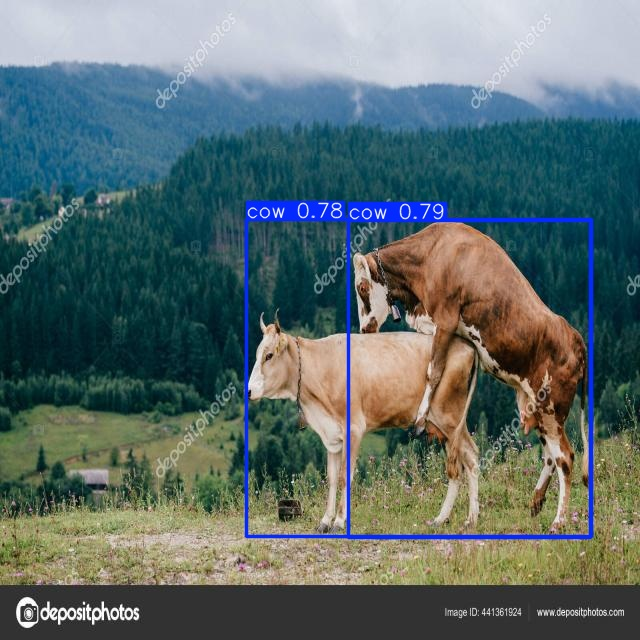

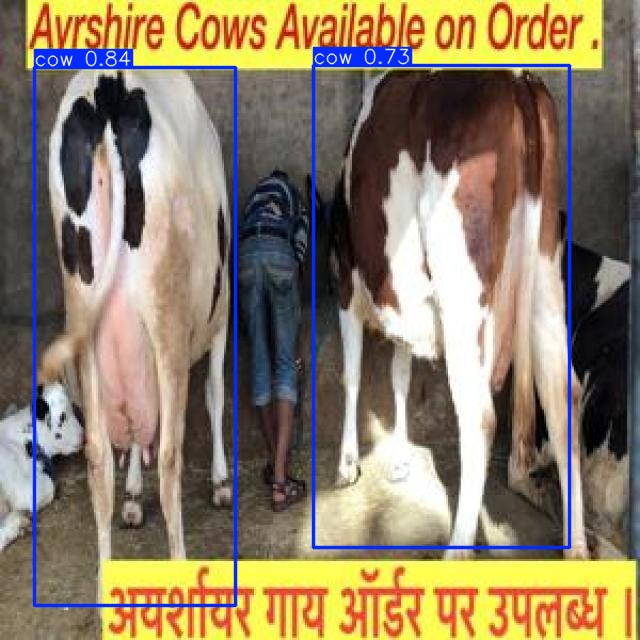

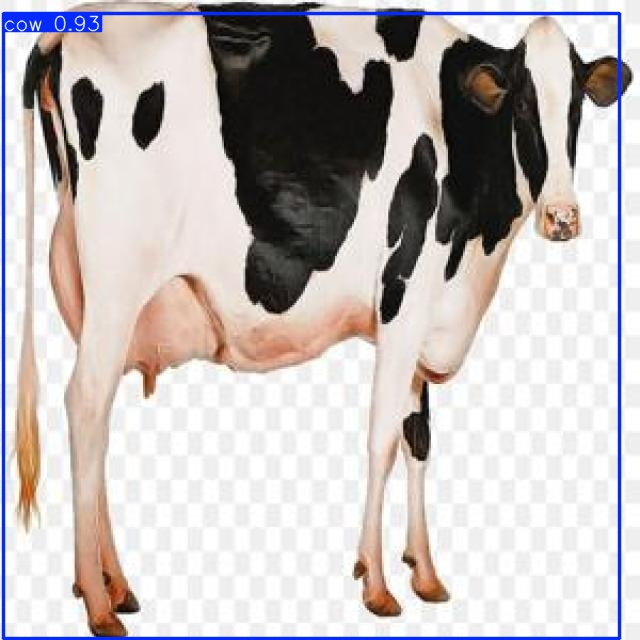

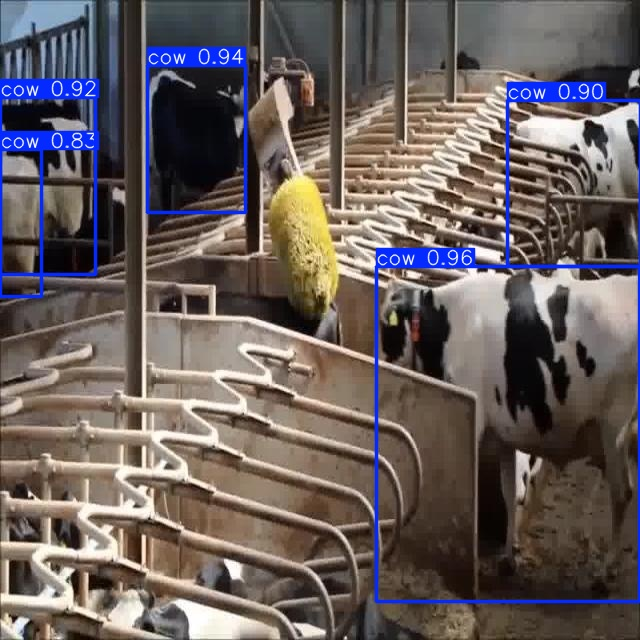

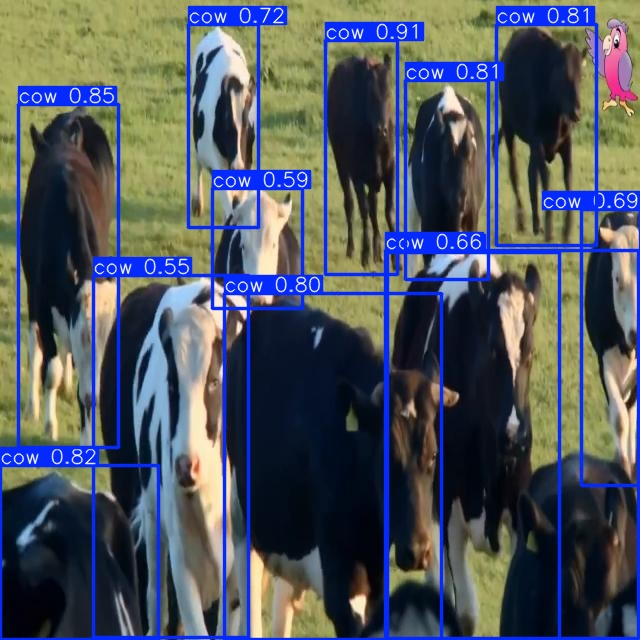

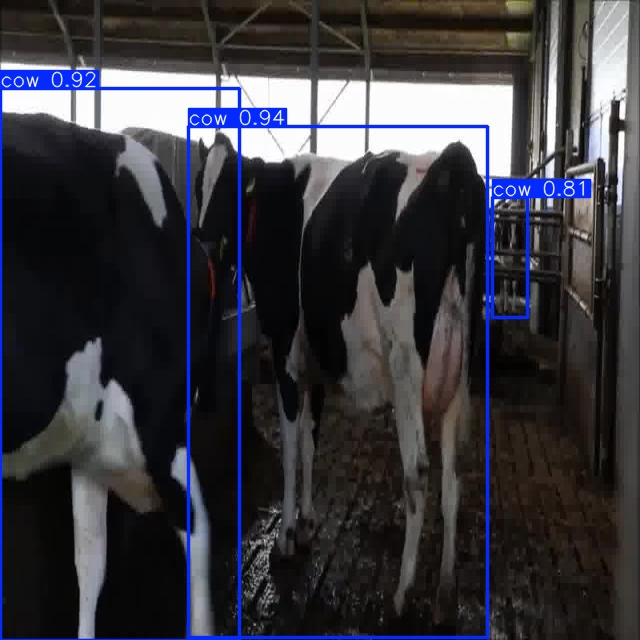

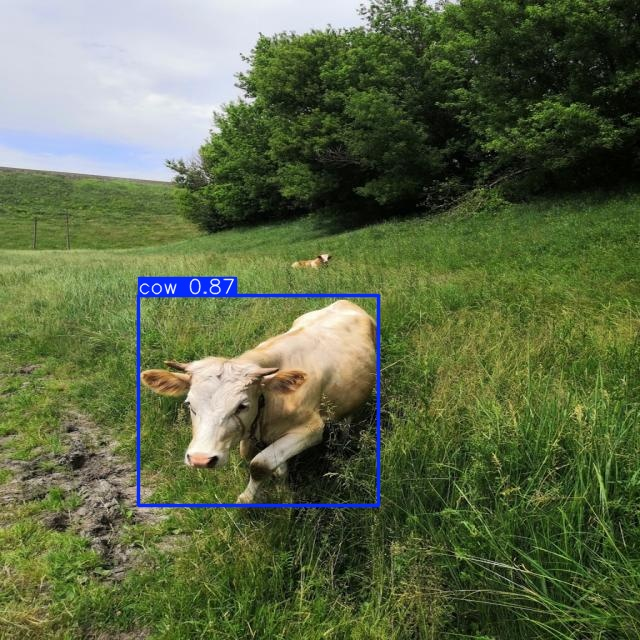

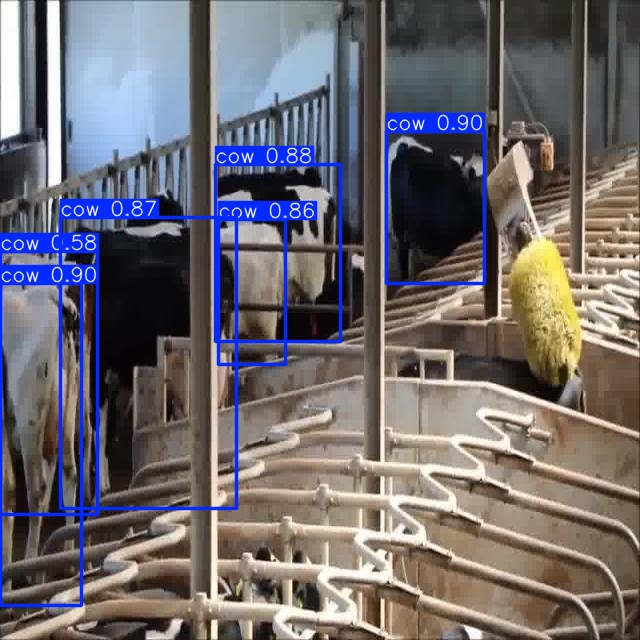

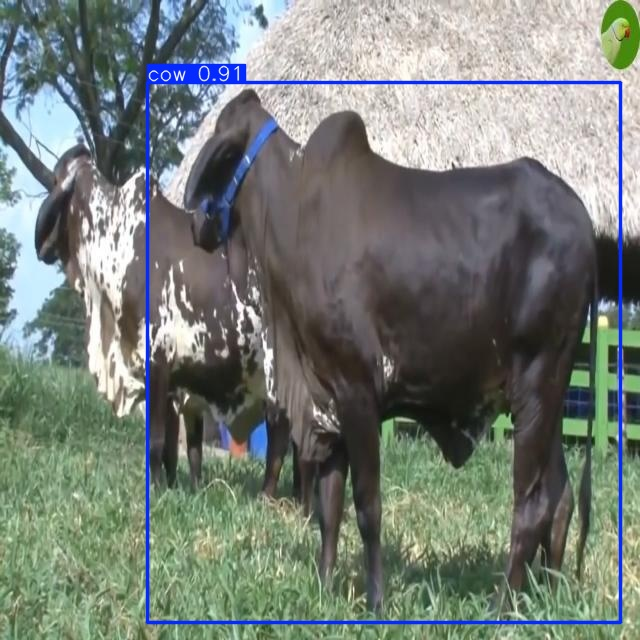

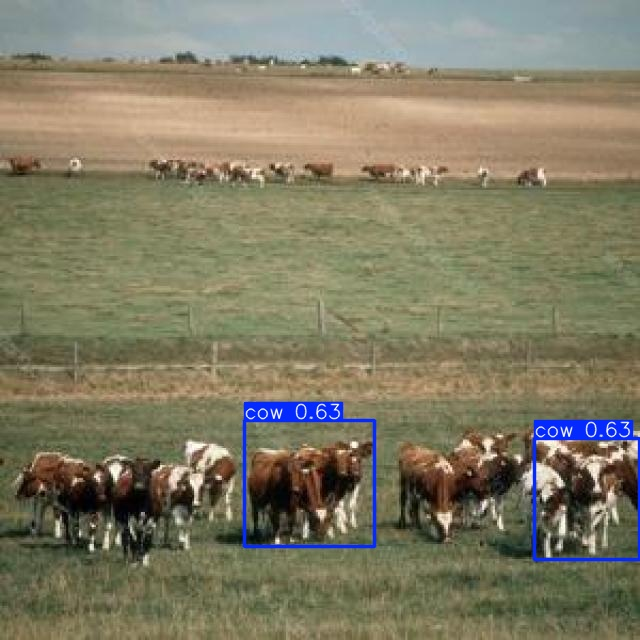

In [19]:
from IPython.display import Image, display
import glob

for image_path in glob.glob('runs/detect/predict/*.jpg')[:10]:
    display(Image(filename=image_path))


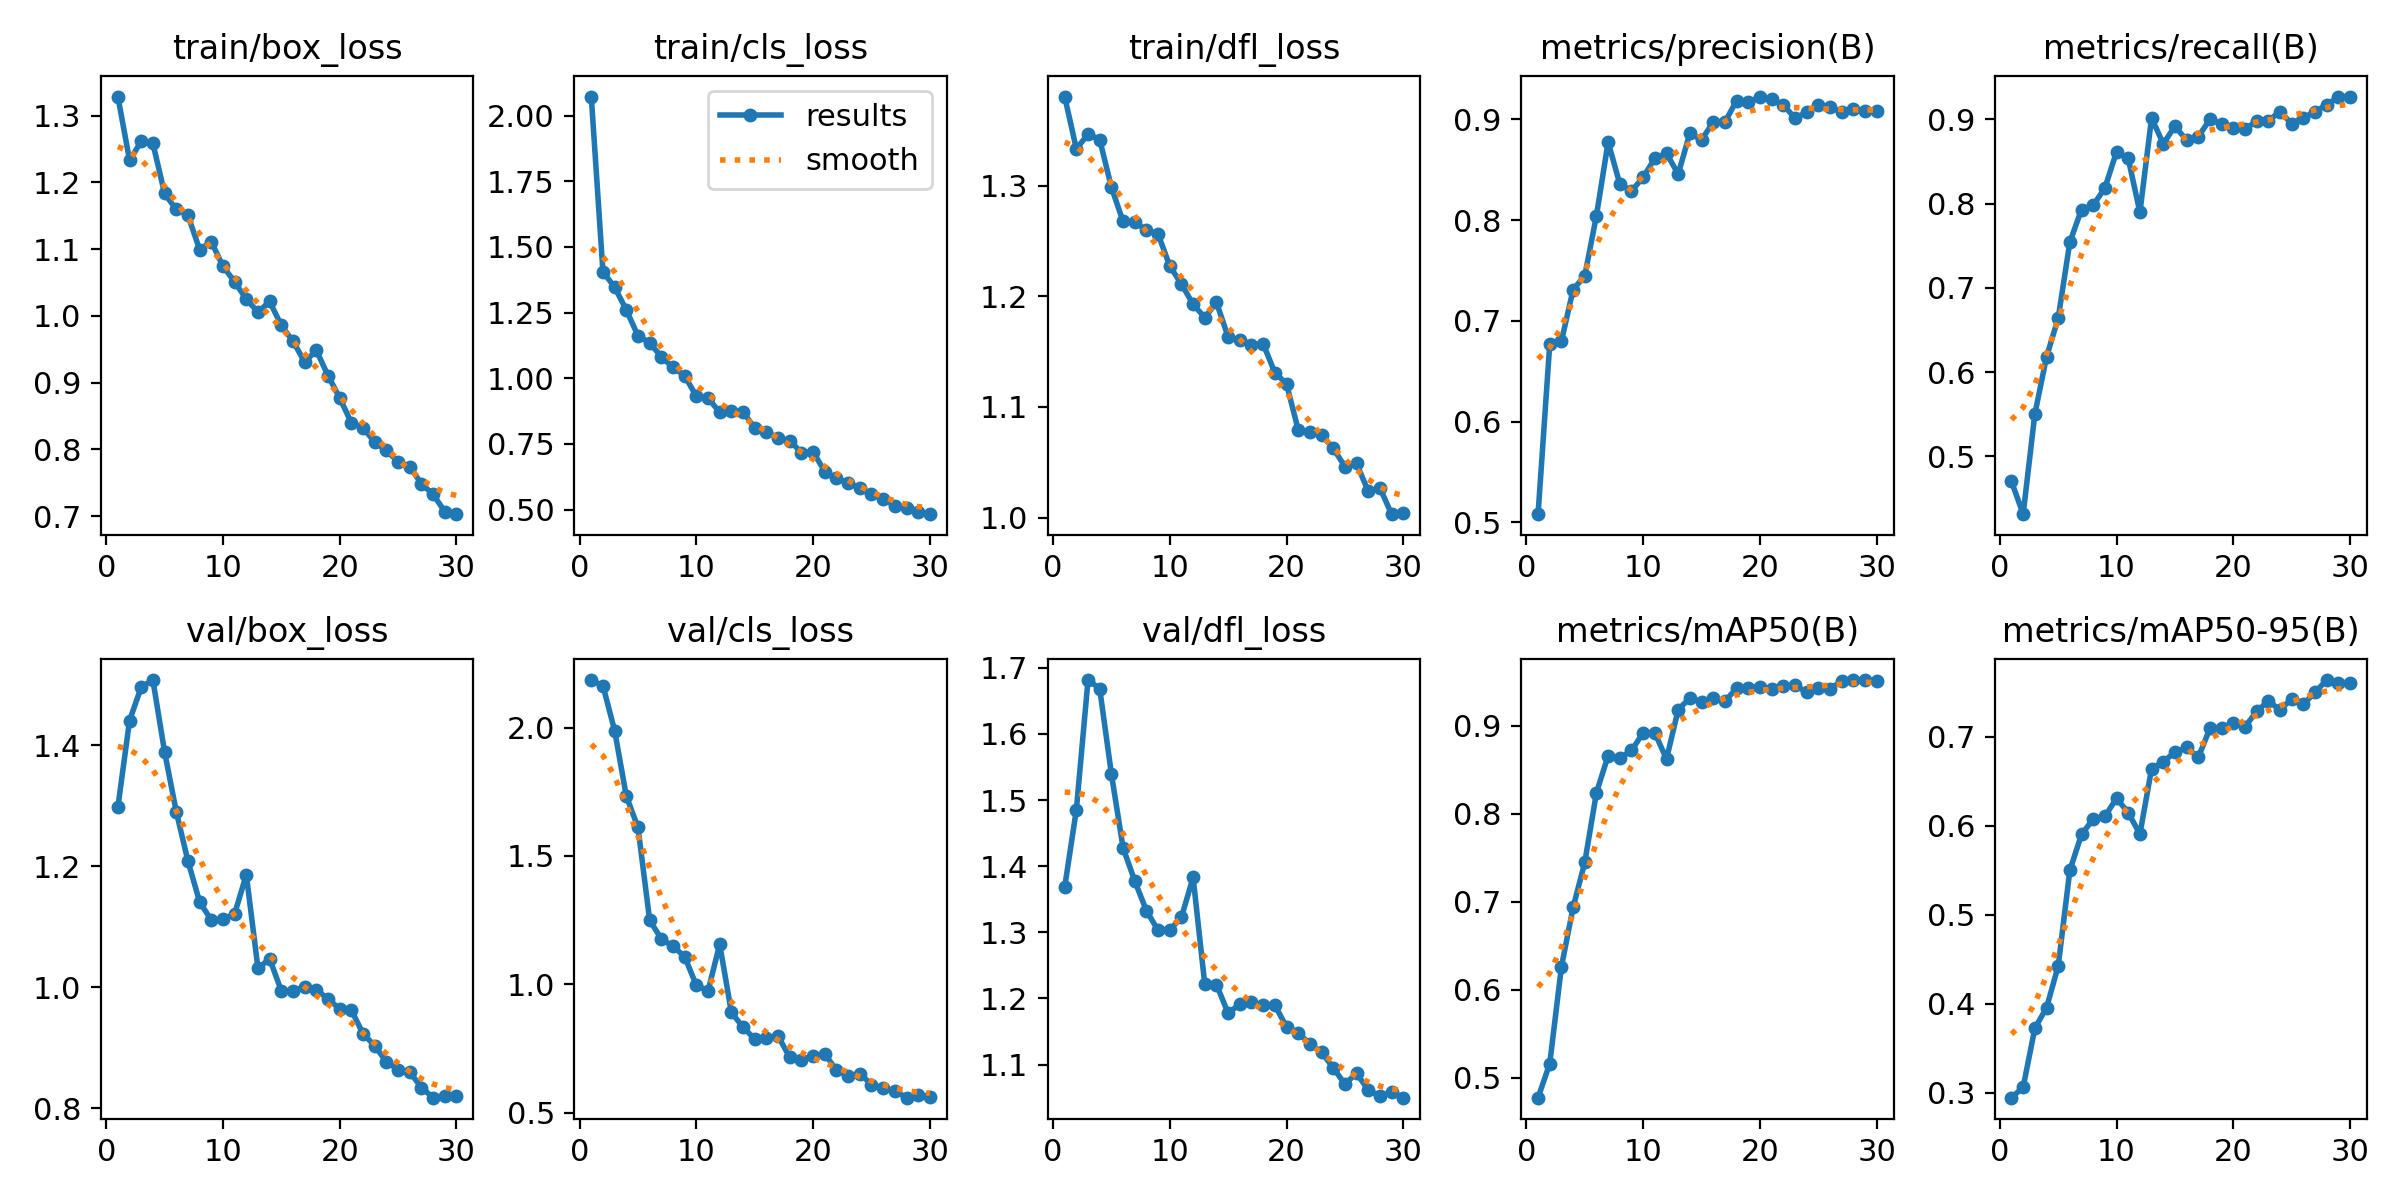

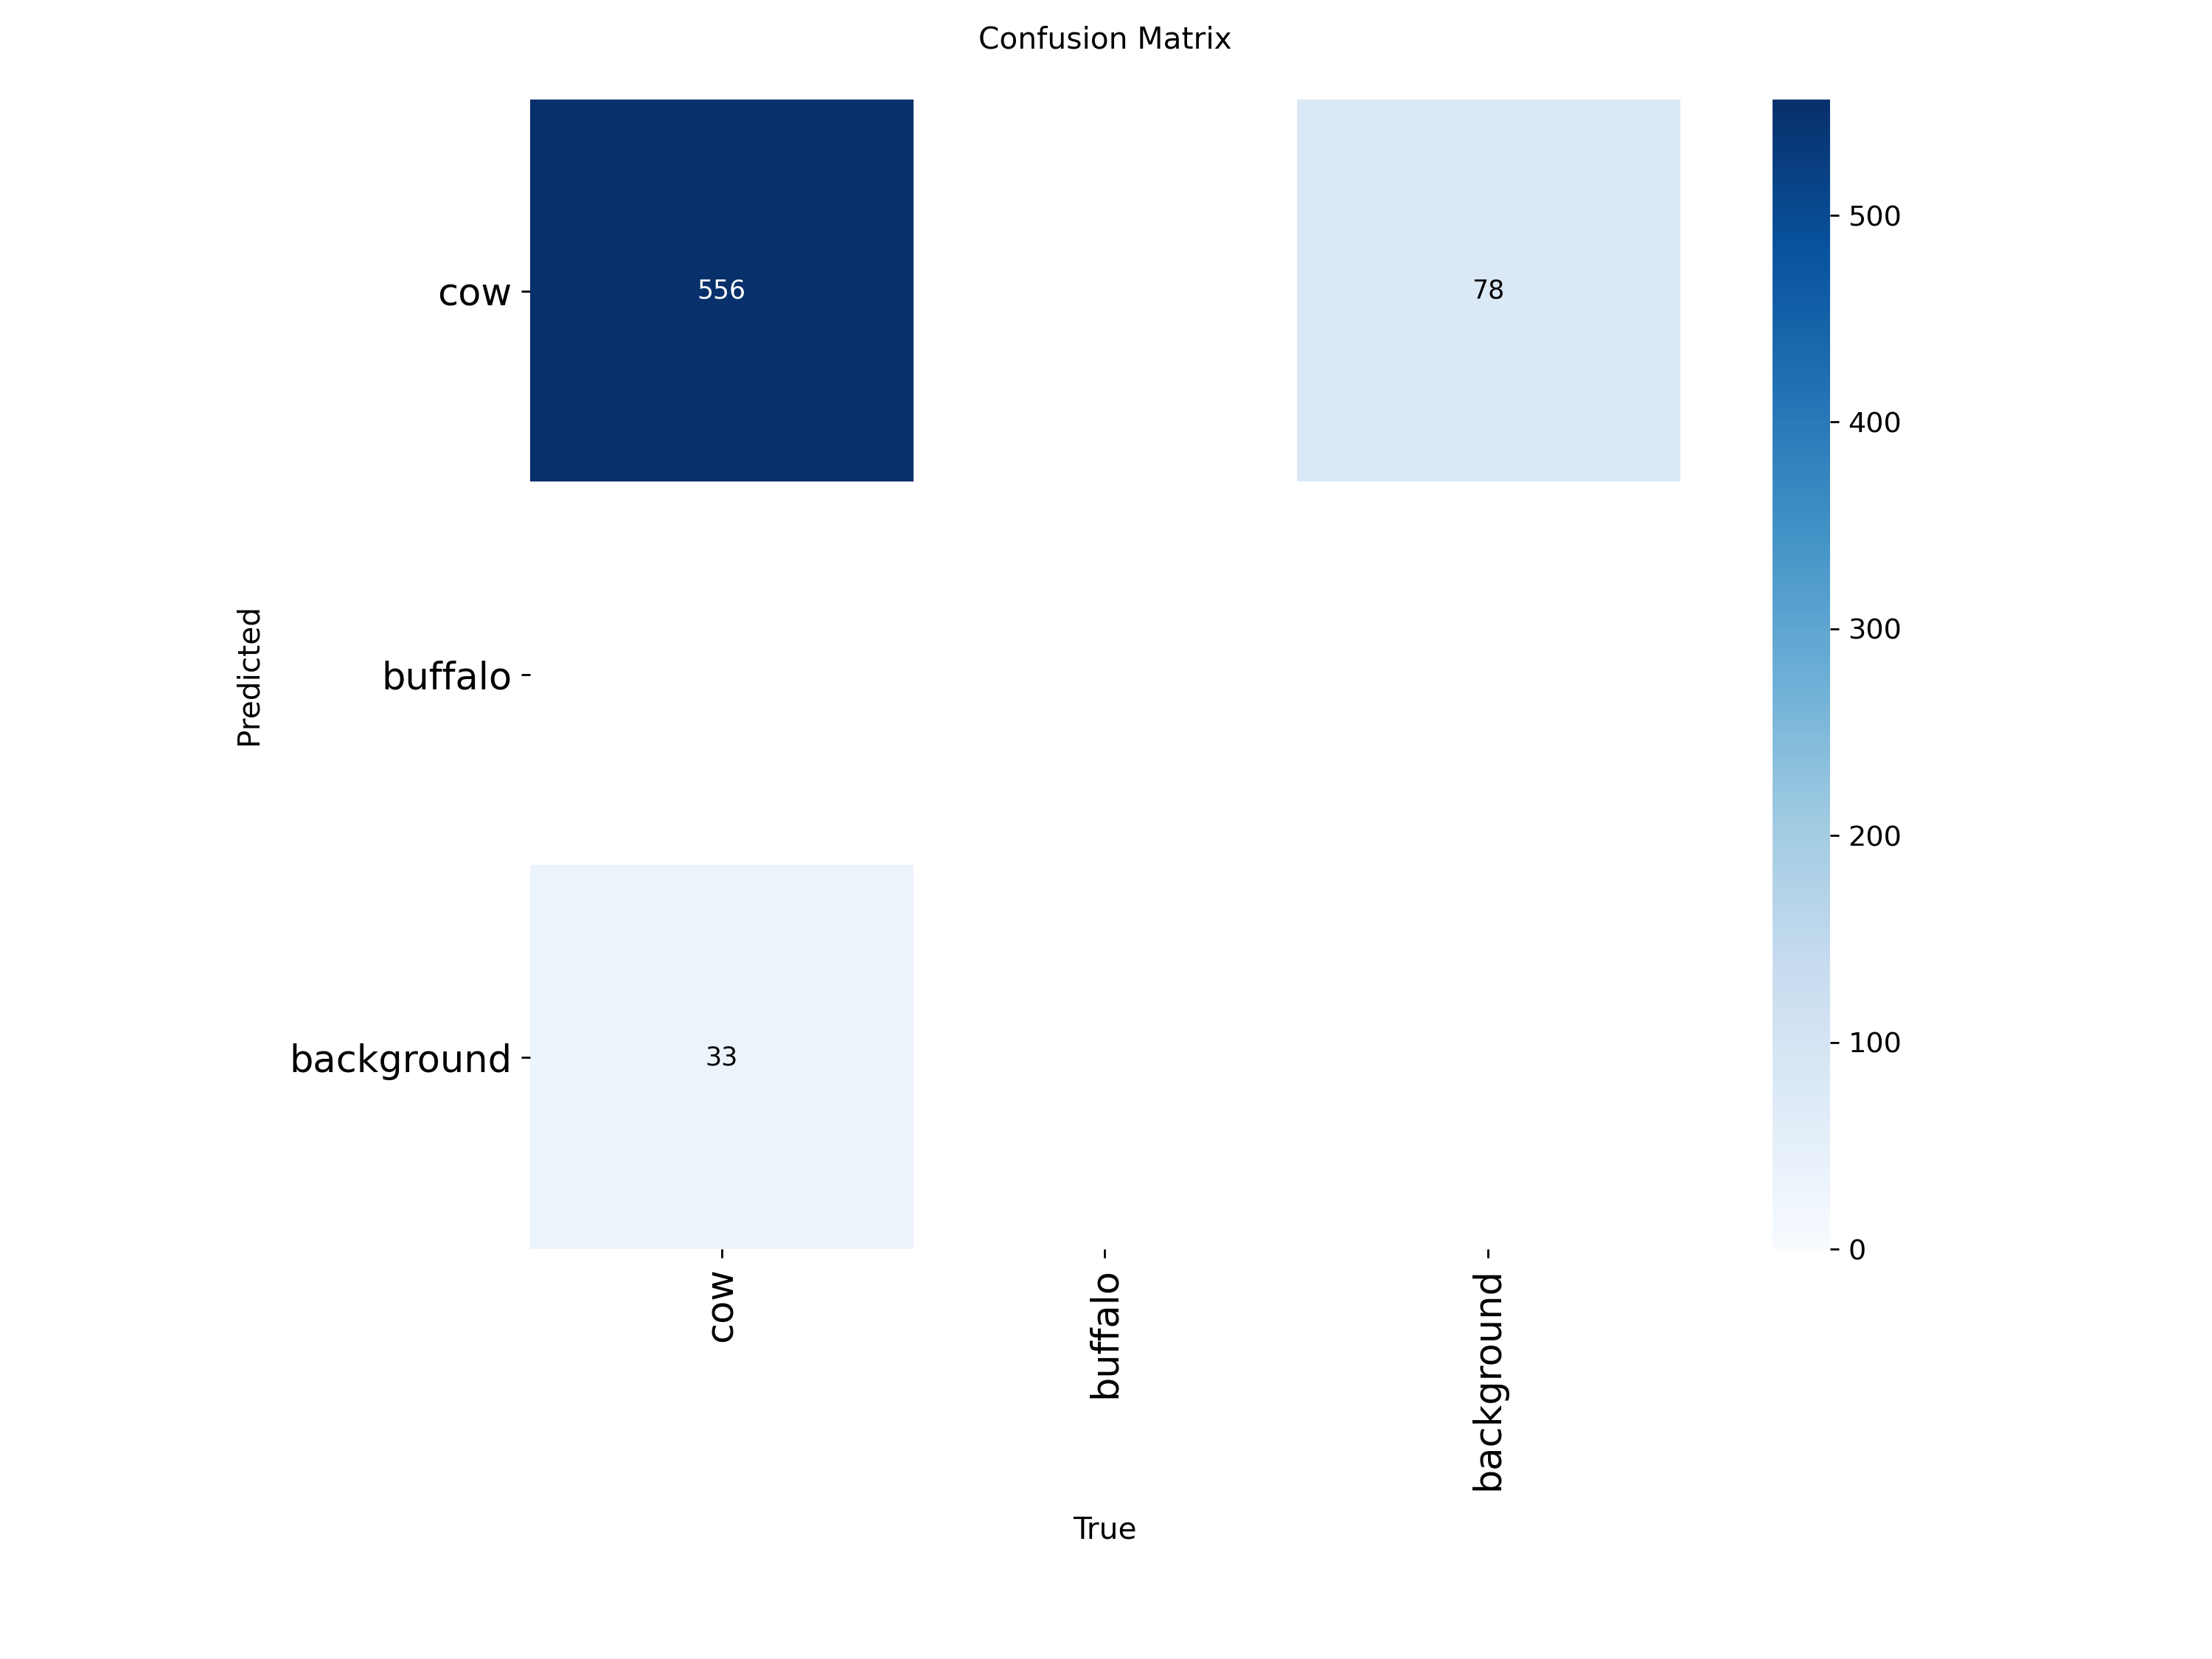

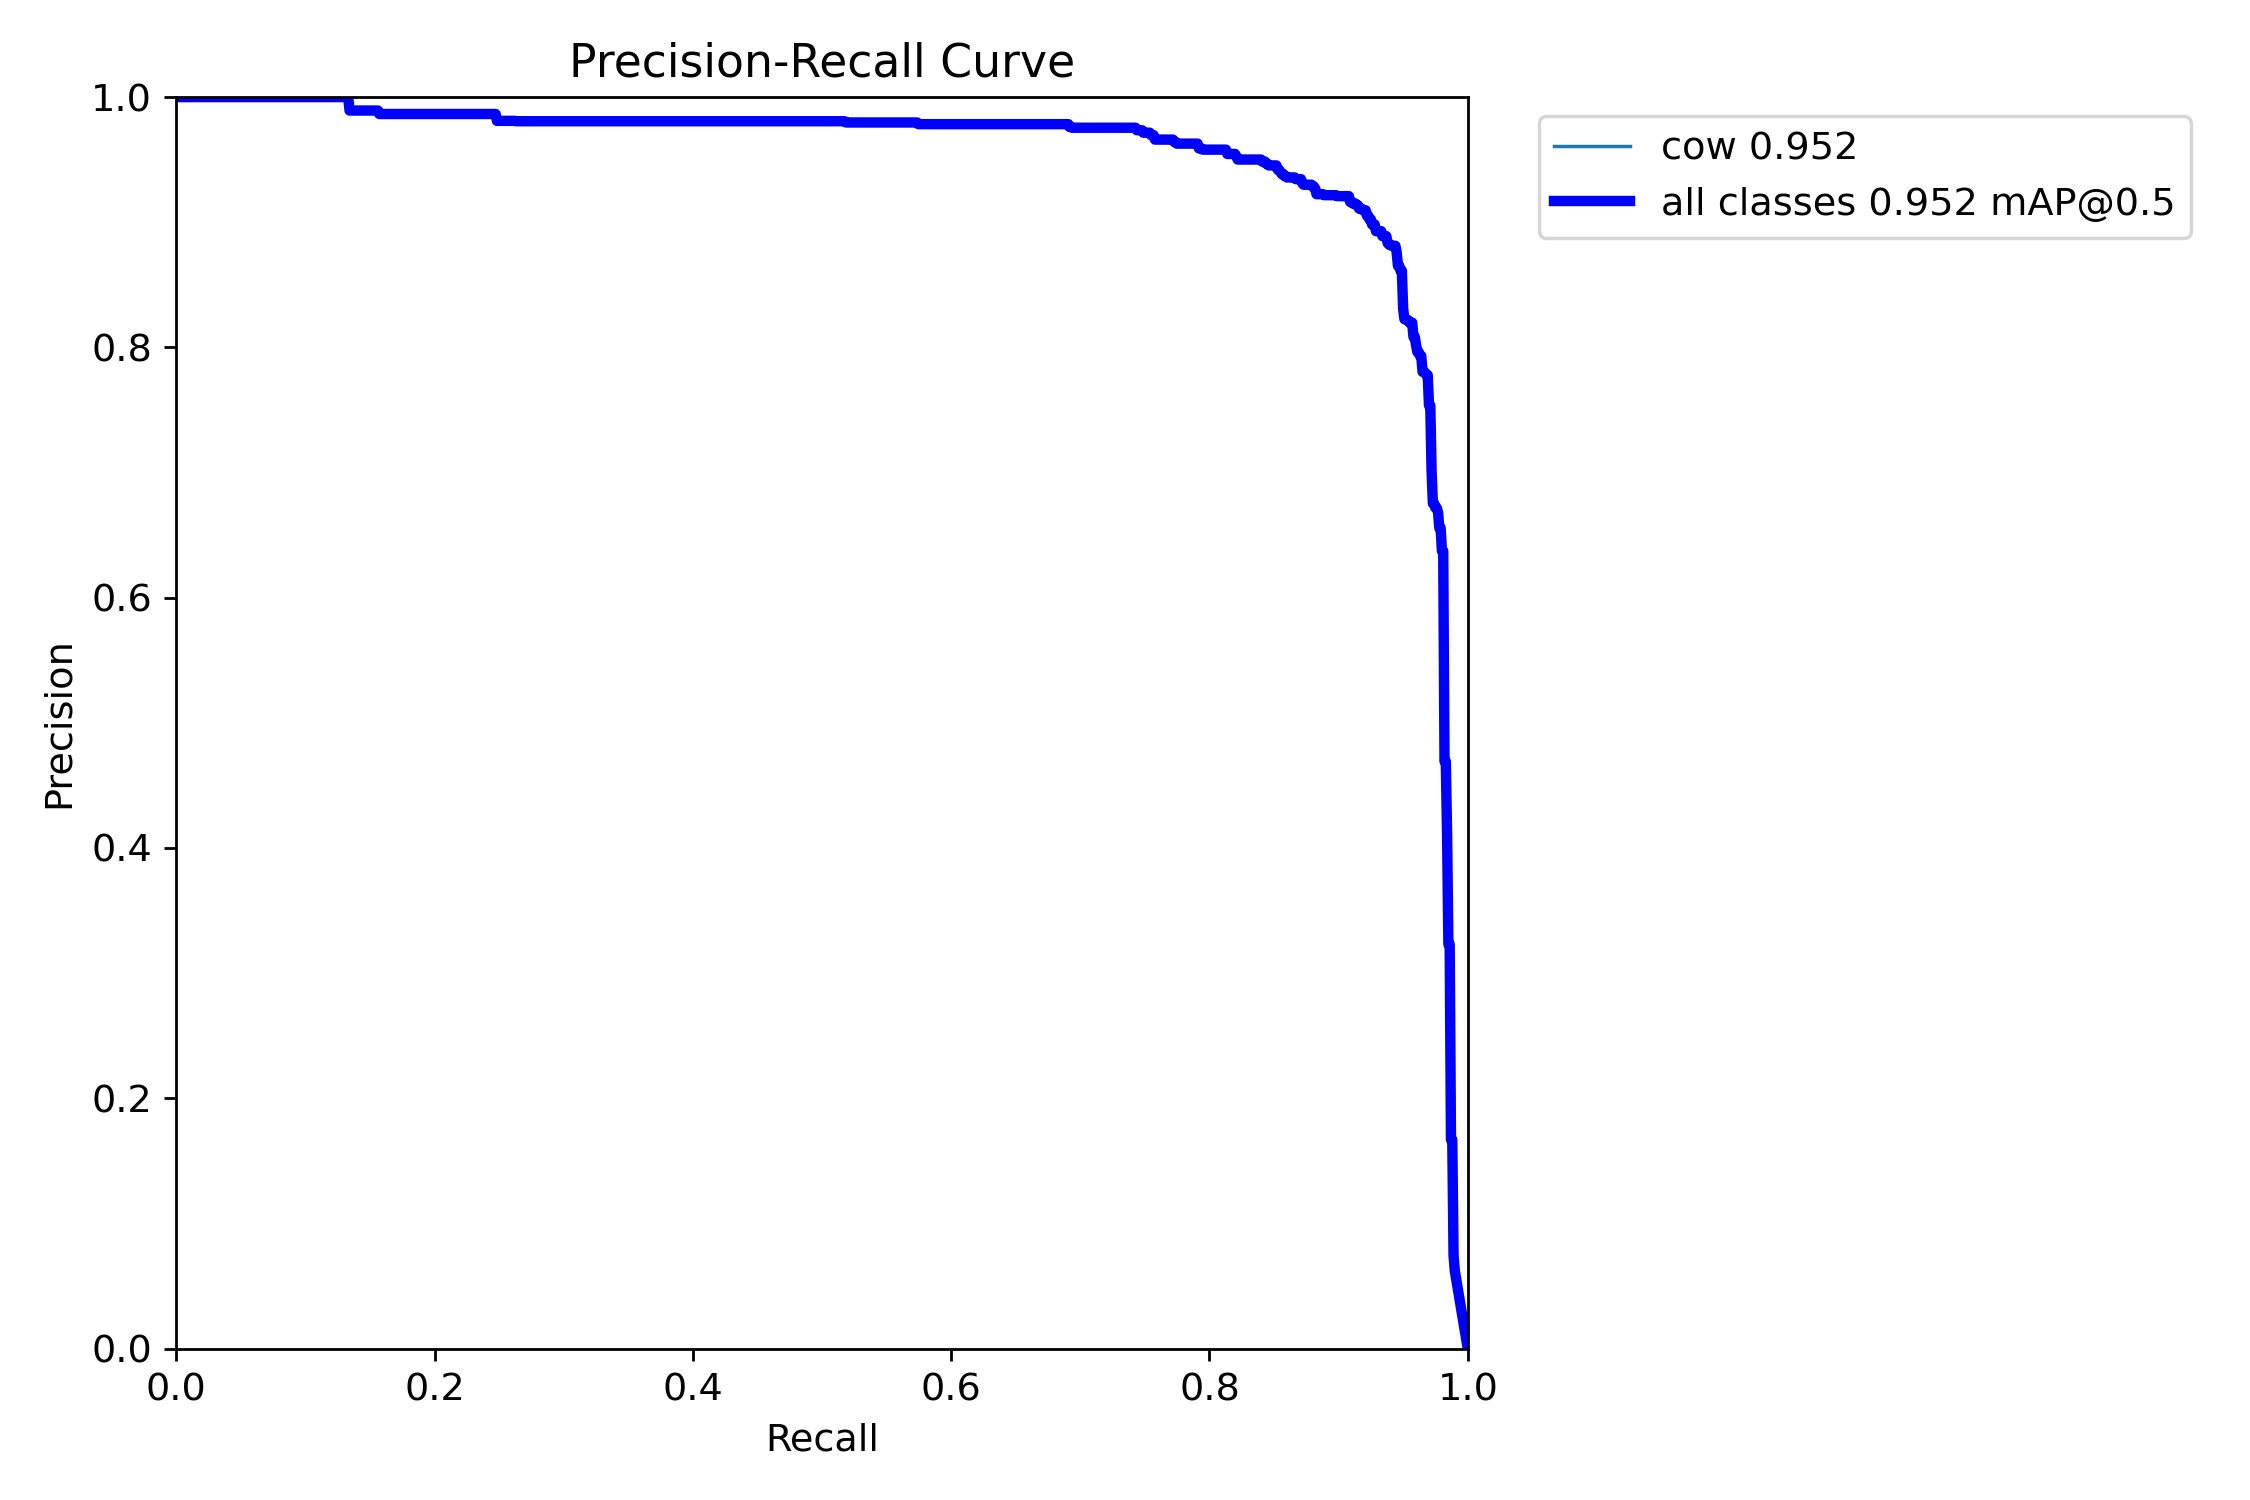

In [20]:
from IPython.display import Image, display

# Əsas nəticə qrafiki
display(Image(filename='runs/detect/cow_buffalo_detector/results.png'))

# Siniflər üzrə Confusion Matrix
display(Image(filename='runs/detect/cow_buffalo_detector/confusion_matrix.png'))

# Box Precision-Recall əyriləri
display(Image(filename='runs/detect/cow_buffalo_detector/BoxPR_curve.png'))


In [22]:
!mkdir -p cow-buffalo-detector/{data,models,notebook,runs}


In [23]:
!cp data/cows_buffalo/data.yaml cow-buffalo-detector/data/


In [26]:
!cp -r runs/detect/cow_buffalo_detector cow-buffalo-detector/runs/


In [27]:
model.export(format="onnx")


Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/cow_buffalo_detector/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1rc1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 7.5s, saved as 'runs/detect/cow_buffalo_detector/weights/best.onnx' (11.7 MB)

Export complete (8.4s)
Results saved to /content/runs/detect/cow_buffalo_detector/weights
Predict:         yolo predict task=detect model=runs/detect/cow_buffalo_dete

'runs/detect/cow_buffalo_detector/weights/best.onnx'

In [28]:
!cp runs/detect/cow_buffalo_detector/weights/best.pt cow-buffalo-detector/models/
!cp runs/detect/cow_buffalo_detector/weights/best.onnx cow-buffalo-detector/models/


In [29]:
!cp /content/cow_buffalo_detection_yolov8.ipynb cow-buffalo-detector/notebook/


cp: cannot stat '/content/cow_buffalo_detection_yolov8.ipynb': No such file or directory


In [31]:
!ls /content


cow-buffalo-detector			      data	   sample_data
cow_buffalo_detector_best.zip		      kaggle.json  yolov8n.pt
cows-and-buffalo-computer-vision-dataset.zip  runs
